# Question 1 (Machine Learning (Classification))
## 1.Part a)
Choose one of the toy classification datasets bundled with sklearn other than the digits dataset. 

## Answer:

"Breast Cancer data-set" is selected

## 1.Part b)

Train three distinct sklearn classification estimators for the chosen dataset and compare the results to see which one performs the best when using 2-fold cross-validation. Note that you should use three distinct classification models here (not just tweak underlying parameters). A relatively complete listing of the available estimators can be found here (https://scikit-learn.org/stable/supervised_learning.html) -- but make sure you only use classifiers! Unless you have an inclination to do otherwise, I recommend using the model default parameters when available. 

## Answer:

For "Classification & Train sklearn" I chose "K-NN, SVC & GaussianNB" with "2-fold cross-validation" methods


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as knn

#reading data set
cancer = load_breast_cancer()

#Clasicication with 2-fold cross-validation
estimators = {
    'KNeighborsClassifier': knn(), 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

twoFoldAccuracy=[]
twoFoldSd=[]
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=2, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=cancer.data, y=cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')
    twoFoldAccuracy.append(scores.mean())
    twoFoldSd.append(scores.std())


KNeighborsClassifier: mean accuracy=93.32%; standard deviation=0.34%
                 SVC: mean accuracy=91.21%; standard deviation=0.34%
          GaussianNB: mean accuracy=94.02%; standard deviation=0.01%


## 1.Part c) 
Repeat a. for 20-fold cross-validation. Explain in a paragraph the difference in your results when using 20-fold vs 2-fold cross-validation (if any). 

## Answer:

As can be seen from the results in the tables, the accuracy of "GaussianNB" is the best one from three applied classification methods for comparison between 2-fold and 20-fold.

In [3]:
#Clasicication with 20-fold cross-validation
estimators = {
    'KNeighborsClassifier2': knn(), 
    'SVC2': SVC(),
    'GaussianNB2': GaussianNB()}

twentyFoldAccuracy=[]
twentyFoldSd=[]
for estimator_name, estimator_object in estimators.items():
    kfold2 = KFold(n_splits=20, random_state=11, shuffle=True)
    scores2 = cross_val_score(estimator=estimator_object, 
        X=cancer.data, y=cancer.target, cv=kfold2)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores2.mean():.2%}; ' +
          f'standard deviation={scores2.std():.2%}')
    twentyFoldAccuracy.append(scores2.mean())
    twentyFoldSd.append(scores2.std())
# Choose the estimator with the highest mean accuracy score & lower std deviation
print()
import pandas as pd
final_results2 = {'Mean Accuracy': twoFoldAccuracy, 'STD deviation': twoFoldSd}
final_results20 = {'Mean Accuracy': twentyFoldAccuracy, 'STD deviation': twentyFoldSd}
fr2=pd.DataFrame(final_results2)
fr2.index = ['KNN', 'SVC', 'GaussianNB']
fr20=pd.DataFrame(final_results20)
fr20.index = ['KNN', 'SVC', 'GaussianNB']
title = "\033[1m2-FOLD CROSS-VALIDATION\033[0m"
print(title.center(50),"\n",fr2)
title = "\033[1m20-FOLD CROSS-VALIDATION\033[0m"
print("\n",title.center(50),"\n",fr20)


KNeighborsClassifier2: mean accuracy=92.80%; standard deviation=4.48%
                SVC2: mean accuracy=91.39%; standard deviation=6.40%
         GaussianNB2: mean accuracy=93.85%; standard deviation=3.96%

         2-FOLD CROSS-VALIDATION           
             Mean Accuracy  STD deviation
KNN              0.933222       0.003398
SVC              0.912132       0.003361
GaussianNB       0.940246       0.000105

          20-FOLD CROSS-VALIDATION          
             Mean Accuracy  STD deviation
KNN              0.928017       0.044761
SVC              0.913855       0.063953
GaussianNB       0.938547       0.039608


## 1.Part d) 
Construct a confusion matrix for your most accurate model between the three estimators and two cross-fold options

## Answer:


The classifier incorrectly predicted 7 of 143 samples.
The Accuracy is= 95.10%


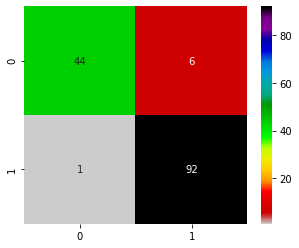

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)
gnb.fit(X=X_train, y=y_train)
predicted_labels = gnb.predict(X=X_test)
expected_labels = y_test
wrong = [(p, e) for (p, e) in zip(predicted_labels, expected_labels) if p != e]
print(f'The classifier incorrectly predicted {len(wrong)} of {len(expected_labels)} samples.')
print('The Accuracy is=',f'{gnb.score(X_test, y_test):.2%}')
confusion = confusion_matrix(y_true=expected_labels, y_pred=predicted_labels)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
confusion_fr = pd.DataFrame(confusion, index=range(2), columns=range(2))
figure = plt.figure(figsize=(5, 4))
axes = sns.heatmap(confusion_fr, annot=True, 
                   cmap='nipy_spectral_r')

## 1.Part e) 
Which class in your dataset is most accurately predicted to have the correct label by the best classifier, and which is most likely to be confused among one or more of the wrong classes?(You can use a cell in a jupyter notebook file for this or a separate text/document file).

## Answer:
The confusion matrix verifies that we have 44 True Positives (44 True Detection from Class 0), 6 False Positives (6 False Detection from Class 0), 1 False Negatives (1 False Detection from Class 1) and 92 False Negatives(92 True Detection from Class 1).

Then, the best class will class 1 with 92 True Detection (98.93%) of predited data and 1 Flase Detecteion (1.07%). 

And, class 0 with 6 Flase Detection (12%) of predicted data and 44 True Detection (88%) is most confused class. 

# Question 2 (Option I). (Machine Learning (Regression))


## 2. Part a)
Locate a non-proprietary, small-scale dataset suitable for regression online. There are countless sources and repositories than you can use in this task, but if you have trouble finding one, I recommend starting via Kaggle (https://www.kaggle.com/code/rtatman/datasets-for-regression-analysis/notebook). Explain briefly what the dataset represents, what target variable you will be using, and what other features are present. You may want or need to apply preprocessing to your data to insure it can be used properly with the regression models (e.g. making every feature numeric through transformation or by dropping some)

## Answer:

For this Question I used Admission Dataset in the universities available on: https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

- The target variable is the "Chance of Admit".

- Evaluation of the dataset shows that all data are numerical and there are no missing data or noisy inputs. Therefore, we skip the preprocessing step.


## 2.Part b)
Train three distinct sklearn regression estimators for the chosen dataset and compare the results to see which one performs the best when using 10-fold cross-validation, utilizing the R-Squared score to gauge performance. Note that you should use two distinct regression models here (not just tweak underlying parameters). A relatively complete listing of the available estimators can be found here (https://scikit-learn.org/stable/supervised_learning.html) -- but make sure you only use regression models! Unless you have an inclination to do otherwise, I recommend using the model default parameters when available.

## Answer:

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load data
admissionData = pd.read_csv('admission_data.csv')
admissionData.columns = ['Serial', 'GRE', 'TOFEL', 'Uni-Rate', 'SOP', 'LOR', 'CGPA', 'Research', 'CHofAD']

# determine features and target parts in dataset
features = admissionData.drop('CHofAD', axis=1)
target = admissionData['CHofAD']

#Initialize linear regression and Perform 10-fold cross-validation and calculate mean R-Squared score 
linearReg_model = LinearRegression()
linearReg_scores = cross_val_score(linearReg_model, features, target, cv=10, scoring='r2')
linear_mean_score = linearReg_scores.mean()
print('Linear Regression Mean R-Squared Score:', linear_mean_score)

#Initialize rigid regression and Perform 10-fold cross-validation and calculate mean R-Squared score
ridgeReg_model = Ridge(alpha=1.0)
ridgeReg_scores = cross_val_score(ridgeReg_model, features, target, cv=10, scoring='r2')
ridge_mean_score = ridgeReg_scores.mean()
print('Ridge Regression Mean R-Squared Score:', ridge_mean_score)

#Initialize randomforest regression and Perform 10-fold cross-validation and calculate mean R-Squared score
randomForestReg_model = RandomForestRegressor(n_estimators=100)
randomForestReg_scores = cross_val_score(randomForestReg_model, features, target, cv=10, scoring='r2')
randomForest_mean_score = randomForestReg_scores.mean()
print('Random Forest Regression Mean R-Squared Score:', randomForest_mean_score)

#Initialize gradient boostin regression and Perform 10-fold cross-validation and calculate mean R-Squared score 
gradientBoostinReg_model = GradientBoostingRegressor()
gradientBoostinReg_scores = cross_val_score(gradientBoostinReg_model, features, target, cv=10, scoring='r2')
gradientBoostin_mean_score = gradientBoostinReg_scores.mean()
print('Gradient Boostin Regression Mean R-Squared Score:', gradientBoostin_mean_score)

#Initialize decision tree regression and Perform 10-fold cross-validation and calculate mean R-Squared score 
decisionTreeReg_model = DecisionTreeRegressor()
decisionTreeReg_scores = cross_val_score(decisionTreeReg_model, features, target, cv=10, scoring='r2')
decisionTree_mean_score = decisionTreeReg_scores.mean()
print('Decision Tree Regression Mean R-Squared Score:', decisionTree_mean_score)



Linear Regression Mean R-Squared Score: 0.7807105665823387
Ridge Regression Mean R-Squared Score: 0.7807807487768372
Random Forest Regression Mean R-Squared Score: 0.7668914050303173
Gradient Boostin Regression Mean R-Squared Score: 0.7383610753179488
Decision Tree Regression Mean R-Squared Score: 0.5744366073065912


## 2.Part c)
Repeat part b utilizing the Mean Square Error to gauge performance. Briefly research the difference between the two metrics (MSE and R2), and explain in a paragraph or two i. the difference between them ii. when each one is the preferable metric to use. (You can use a cell in a jupyter notebook file for this or a separate text/document file).

## Answer: 

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load data
admissionData = pd.read_csv('admission_data.csv')
admissionData.columns = ['Serial', 'GRE', 'TOFEL', 'Uni-Rate', 'SOP', 'LOR', 'CGPA', 'Research', 'CHofAD']

# determine features and target parts in dataset
features = admissionData.drop('CHofAD', axis=1)
target = admissionData['CHofAD']


#Initialize linear regression and Perform 10-fold cross-validation and calculate mean MSE score 
linearReg_model = LinearRegression()
linearReg_scores = cross_val_score(linearReg_model, features, target, cv=10, scoring='neg_mean_squared_error')
linear_mse = -linearReg_scores
linear_mean_mse = linear_mse.mean()
print('Linear Regression Mean MSE Score:', linear_mean_mse)

#Initialize rigid regression and Perform 10-fold cross-validation and calculate mean MSE score
ridgeReg_model = Ridge(alpha=1.0)
ridgeReg_scores = cross_val_score(ridgeReg_model, features, target, cv=10, scoring='neg_mean_squared_error')
ridge_mse = -ridgeReg_scores
ridge_mean_mse = ridge_mse.mean()
print('Ridge Regression Mean MSE Score:', ridge_mean_mse)

#Initialize randomforest regression and Perform 10-fold cross-validation and calculate mean MSE score
RandomForestReg_model = RandomForestRegressor(n_estimators=100)
RandomForestReg_scores = cross_val_score(RandomForestReg_model, features, target, cv=10, scoring='neg_mean_squared_error')
RandomForest_mse = -RandomForestReg_scores
RandomForest_mean_mse = RandomForest_mse.mean()
print('Random Forest Regression Mean MSE Score:', RandomForest_mean_mse)

#Initialize gradient boostin regression and Perform 10-fold cross-validation and calculate mean MSE score
gradientBoostinReg_model = GradientBoostingRegressor()
gradientBoostinReg_scores = cross_val_score(gradientBoostinReg_model, features, target, cv=10, scoring='neg_mean_squared_error')
gradientBoostin_mse = -gradientBoostinReg_scores
gradientBoostin_mean_score = gradientBoostin_mse.mean()
print('Gradient Boostin Regression Mean MSE Score:', gradientBoostin_mean_score)

#Initialize decision tree regression and Perform 10-fold cross-validation and calculate mean MSE score 
decisionTreeReg_model = DecisionTreeRegressor()
decisionTreeReg_scores = cross_val_score(decisionTreeReg_model, features, target, cv=10, scoring='neg_mean_squared_error')
decisionTree_mse = -decisionTreeReg_scores
decisionTree_mean_score = decisionTree_mse.mean()
print('Decision Tree Regression Mean MSE Score:', decisionTree_mean_score)


Linear Regression Mean MSE Score: 0.004291259223446245
Ridge Regression Mean MSE Score: 0.004289860296942606
Random Forest Regression Mean MSE Score: 0.004715465375
Gradient Boostin Regression Mean MSE Score: 0.005364036811633446
Decision Tree Regression Mean MSE Score: 0.00819675


## MSE:
MSE shows the average squared difference between the actual values and predicted values of the target variable. Infact, it quantifies the overall magnitude of the error of the model. A lower MSE indicates that the model is a better fit for the data. Therefore based on MSE Ridge Regression and Linear Regression are the best models and Decision Tree is the worst model.

## R2:
R2 shows the proportion of the variation in the target variable that is explained by the features in the model. The value of R2 is between 0 and 1, where higher values indicating that the model explains more of the variation in the target variable. is useful when the focus is on understanding the relationship between the dependent and independent variables. 

